In [1]:
#pip install geoip2 pandas

In [2]:
import pandas as pd

df = pd.read_csv('/Users/cybersecurity_attacks.csv')

In [3]:
pd.set_option('display.max_columns', None)
df

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,2023-05-26 14:08:42,26.36.109.26,121.100.75.240,31005,6764,UDP,1428,Control,HTTP,Quibusdam ullam consequatur consequuntur accus...,IoC Detected,39.28,NaN,DDoS,Known Pattern A,Logged,Medium,Adira Madan,Mozilla/5.0 (iPad; CPU iPad OS 14_2_1 like Mac...,Segment A,"Nashik, Manipur",NaN,Log Data,Alert Data,Firewall
39996,2023-03-27 00:38:27,17.21.163.81,196.108.134.78,2553,28091,UDP,1184,Control,HTTP,Quaerat neque esse. Animi expedita natus commo...,IoC Detected,27.25,NaN,DDoS,Known Pattern A,Logged,High,Rati Dara,Mozilla/5.0 (Windows; U; Windows 98; Win 9x 4....,Segment C,"Vadodara, Mizoram",60.51.30.46,Log Data,NaN,Firewall
39997,2022-03-31 01:45:49,162.35.217.57,98.107.0.15,22505,25152,UDP,1043,Data,DNS,Enim at aspernatur illum. Saepe numquam eligen...,IoC Detected,31.01,NaN,DDoS,Known Pattern B,Blocked,Low,Samiha Joshi,Mozilla/5.0 (Windows; U; Windows NT 4.0) Apple...,Segment C,"Mahbubnagar, Himachal Pradesh",NaN,Log Data,Alert Data,Server
39998,2023-09-22 18:32:38,208.72.233.205,173.79.112.252,20013,2703,UDP,483,Data,FTP,Officiis dolorem sed harum provident earum dis...,IoC Detected,97.85,Alert Triggered,Malware,Known Pattern B,Ignored,Low,Rasha Chauhan,Mozilla/5.0 (X11; Linux i686) AppleWebKit/536....,Segment B,"Rourkela, Arunachal Pradesh",137.76.130.8,Log Data,NaN,Server


In [4]:
df.isnull().any()

Timestamp                 False
Source IP Address         False
Destination IP Address    False
Source Port               False
Destination Port          False
Protocol                  False
Packet Length             False
Packet Type               False
Traffic Type              False
Payload Data              False
Malware Indicators         True
Anomaly Scores            False
Alerts/Warnings            True
Attack Type               False
Attack Signature          False
Action Taken              False
Severity Level            False
User Information          False
Device Information        False
Network Segment           False
Geo-location Data         False
Proxy Information          True
Firewall Logs              True
IDS/IPS Alerts             True
Log Source                False
dtype: bool

In [5]:
df['Alerts/Warnings'].isnull().value_counts()

Alerts/Warnings
True     20067
False    19933
Name: count, dtype: int64

In [6]:
df['Attack Type'].value_counts()

Attack Type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

In [7]:
print(df['Malware Indicators'].isnull().value_counts())

Malware Indicators
False    20000
True     20000
Name: count, dtype: int64


In [8]:
print(df['Proxy Information'].isnull().value_counts())

Proxy Information
False    20149
True     19851
Name: count, dtype: int64


In [9]:
df.columns = [col.lower().replace(' ', '_') for col in df.columns]

In [10]:
df['geo-location_data'].value_counts()

geo-location_data
Ghaziabad, Meghalaya              16
Kalyan-Dombivli, Jharkhand        15
Ghaziabad, Uttarakhand            14
Ghaziabad, Tripura                14
Yamunanagar, Arunachal Pradesh    13
                                  ..
Ajmer, Assam                       1
Jodhpur, Meghalaya                 1
Jalgaon, Himachal Pradesh          1
Dehri, Uttarakhand                 1
Anantapuram, Karnataka             1
Name: count, Length: 8723, dtype: int64

In [11]:
# Load GeoLite2 database
import geoip2.database
geoip_db_path = '/Users/GeoLite2-City_20240618/GeoLite2-City.mmdb'
reader = geoip2.database.Reader(geoip_db_path)

# Function to get location data
def get_location(ip):
    try:
        response = reader.city(ip)
        return {
            'latitude': response.location.latitude,
            'longitude': response.location.longitude,
            'country': response.country.name,
            'region': response.subdivisions.most_specific.name,
            'city': response.city.name
        }
    except:
        return {
            'latitude': None,
            'longitude': None,
            'country': None,
            'region': None,
            'city': None
        }

# Apply the function to the destination_ip column
destination_locations = df['destination_ip_address'].apply(get_location)
destination_locations_df = pd.DataFrame(destination_locations.tolist())
destination_locations_df = destination_locations_df.add_prefix('dest_')

# Apply the function to the source_ip column
source_locations = df['source_ip_address'].apply(get_location)
source_locations_df = pd.DataFrame(source_locations.tolist())
source_locations_df = source_locations_df.add_prefix('source_')

# Merge the location data with the original DataFrame
df = pd.concat([df, destination_locations_df, source_locations_df], axis=1)

In [12]:
df.head()

,timestamp,source_ip_address,destination_ip_address,source_port,destination_port,protocol,packet_length,packet_type,traffic_type,payload_data,malware_indicators,anomaly_scores,alerts/warnings,attack_type,attack_signature,action_taken,severity_level,user_information,device_information,network_segment,geo-location_data,proxy_information,firewall_logs,ids/ips_alerts,log_source,dest_latitude,dest_longitude,dest_country,dest_region,dest_city,source_latitude,source_longitude,source_country,source_region,source_city
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,IoC Detected,28.67,NaN,Malware,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server,51.4674,-0.3556,United Kingdom,Hounslow,Hounslow,34.7732,113.7220,China,None,None
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,IoC Detected,51.50,NaN,Malware,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall,46.7734,-92.1231,United States,Minnesota,Duluth,48.8323,2.4075,France,Paris,Paris
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,IoC Detected,87.42,Alert Triggered,DDoS,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall,37.7510,-97.8220,United States,None,None,37.7510,-97.8220,United States,None,None
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,NaN,15.79,Alert Triggered,Malware,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall,31.2222,121.4581,China,Shanghai,Shanghai,35.6897,139.6895,Japan,None,None
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,NaN,0.52,Alert Triggered,DDoS,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall,19.7003,-101.1451,Mexico,Michoacán,Morelia,38.9392,-77.0584,United States,District of Columbia,Washington


In [13]:
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S')
df['date'] = df['timestamp'].dt.date
df['time'] = df['timestamp'].dt.time

In [14]:
df['date'] = pd.to_datetime(df['date'])
df['time'] = df['time'].apply(lambda x: x.strftime('%H:%M'))
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [15]:
df.dtypes

timestamp                 datetime64[ns]
source_ip_address                 object
destination_ip_address            object
source_port                        int64
destination_port                   int64
protocol                          object
packet_length                      int64
packet_type                       object
traffic_type                      object
payload_data                      object
malware_indicators                object
anomaly_scores                   float64
alerts/warnings                   object
attack_type                       object
attack_signature                  object
action_taken                      object
severity_level                    object
user_information                  object
device_information                object
network_segment                   object
geo-location_data                 object
proxy_information                 object
firewall_logs                     object
ids/ips_alerts                    object
log_source      

In [16]:
df['network_segment'].value_counts()

network_segment
Segment C    13408
Segment B    13319
Segment A    13273
Name: count, dtype: int64

In [17]:
df['attack_signature'].value_counts()

attack_signature
Known Pattern A    20076
Known Pattern B    19924
Name: count, dtype: int64

In [18]:
df['traffic_type'].value_counts()

traffic_type
DNS     13376
HTTP    13360
FTP     13264
Name: count, dtype: int64

In [19]:
df['protocol'].value_counts()

protocol
ICMP    13429
UDP     13299
TCP     13272
Name: count, dtype: int64

In [20]:
df['packet_type'].value_counts()

packet_type
Control    20237
Data       19763
Name: count, dtype: int64

In [21]:
df['action_taken'].value_counts()

action_taken
Blocked    13529
Ignored    13276
Logged     13195
Name: count, dtype: int64

In [22]:
df['attack_type'].value_counts()

attack_type
DDoS         13428
Malware      13307
Intrusion    13265
Name: count, dtype: int64

In [23]:
df['geo_city'] = df['geo-location_data'].str.split(',').str[0].str.strip()
df['geo_state'] = df['geo-location_data'].str.split(',').str[1].str.strip()


In [24]:
drop = ['timestamp','ids/ips_alerts', 'log_source', 'source_ip_address','destination_ip_address', 'malware_indicators', 'source_port','destination_port', 'packet_length','packet_type', 'payload_data', 'alerts/warnings', 'attack_signature', 'device_information', 'user_information', 'proxy_information', 'firewall_logs', 'network_segment', 'geo-location_data']
df = df.drop(drop, axis=1)

In [25]:
df = df.dropna(subset=['dest_country'])
df = df.dropna(subset=['source_country'])

In [26]:
df.reset_index(drop=True, inplace=True)
df

,protocol,traffic_type,anomaly_scores,attack_type,action_taken,severity_level,dest_latitude,dest_longitude,dest_country,dest_region,dest_city,source_latitude,source_longitude,source_country,source_region,source_city,date,time,year,month,day,geo_city,geo_state
0,ICMP,HTTP,28.67,Malware,Logged,Low,51.4674,-0.3556,United Kingdom,Hounslow,Hounslow,34.7732,113.7220,China,None,None,2023-05-30,06:33,2023,5,30,Jamshedpur,Sikkim
1,ICMP,HTTP,51.50,Malware,Blocked,Low,46.7734,-92.1231,United States,Minnesota,Duluth,48.8323,2.4075,France,Paris,Paris,2020-08-26,07:08,2020,8,26,Bilaspur,Nagaland
2,UDP,HTTP,87.42,DDoS,Ignored,Low,37.7510,-97.8220,United States,None,None,37.7510,-97.8220,United States,None,None,2022-11-13,08:23,2022,11,13,Bokaro,Rajasthan
3,UDP,HTTP,15.79,Malware,Blocked,Medium,31.2222,121.4581,China,Shanghai,Shanghai,35.6897,139.6895,Japan,None,None,2023-07-02,10:38,2023,7,2,Jaunpur,Rajasthan
4,TCP,DNS,0.52,DDoS,Blocked,Low,19.7003,-101.1451,Mexico,Michoacán,Morelia,38.9392,-77.0584,United States,District of Columbia,Washington,2023-07-16,13:11,2023,7,16,Anantapur,Tripura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39269,UDP,HTTP,39.28,DDoS,Logged,Medium,37.4103,127.2632,South Korea,Gyeonggi-do,Gwangju,37.7510,-97.8220,United States,None,None,2023-05-26,14:08,2023,5,26,Nashik,Manipur
39270,UDP,HTTP,27.25,DDoS,Logged,High,-1.2841,36.8155,Kenya,Nairobi County,Nairobi,40.7123,-74.0068,United States,New York,New York,2023-03-27,00:38,2023,3,27,Vadodara,Mizoram
39271,UDP,DNS,31.01,DDoS,Blocked,Low,37.7510,-97.8220,United States,None,None,37.7510,-97.8220,United States,None,None,2022-03-31,01:45,2022,3,31,Mahbubnagar,Himachal Pradesh
39272,UDP,FTP,97.85,Malware,Ignored,Low,39.0503,-77.3909,United States,Virginia,Sterling,37.7510,-97.8220,United States,None,None,2023-09-22,18:32,2023,9,22,Rourkela,Arunachal Pradesh


In [27]:
df.duplicated().value_counts()

False    39274
Name: count, dtype: int64

In [28]:
# Save to CSV
#df.to_csv('cybersecurity.csv', index=False)

In [29]:
last_date = df['date'].max()
last_date

Timestamp('2023-10-11 00:00:00')

#### MySQL Connection

In [30]:
# import pymysql
# from sqlalchemy import create_engine
# import getpass 
# password = getpass.getpass()

In [31]:
# from sqlalchemy import create_engine

# # MySQL connection details
# host = 'localhost'
# user = 'root'

In [32]:
# import mysql.connector

# port = '3306'
# database = 'Cyber_Attacks'
# table_name = 'Cyber_Attacks'

# conn = mysql.connector.connect(
#     host=host,
#     user=user,
#     password=password,
#     port=port
# )

# cursor = conn.cursor()
# cursor.execute(f"CREATE DATABASE IF NOT EXISTS {database}")
# cursor.close()
# conn.close()

# engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}')

# df.to_sql(name=table_name, con=engine, if_exists='replace', index=False)

In [33]:
# from sqlalchemy import create_engine, text
# with engine.connect() as conn:
#     result = conn.execute(text(f"SELECT * FROM {table_name}"))
#     for row in result:
#         print(row)

### Analysis

In [34]:
# Total attacks where the destination country is the United States
total_attacks = len(df)
us_attacks = df[df['dest_country'] == 'United States']
total_us_attacks = len(us_attacks)

# Both the source and destination countries are the United States
us_to_us_attacks = us_attacks[us_attacks['source_country'] == 'United States']
total_us_to_us_attacks = len(us_to_us_attacks)

# Calculate percentages
percentage_us_total = (total_us_attacks / total_attacks) * 100
percentage_us_to_us = (total_us_to_us_attacks / total_attacks) * 100 

print(f"Percentage of attacks targeting the United States: {percentage_us_total:.2f}%")
print(f"Percentage of attacks originating from the United States targeting the United States: {percentage_us_to_us:.2f}%")

Percentage of attacks targeting the United States: 41.62%
Percentage of attacks originating from the United States targeting the United States: 17.48%


In [35]:
top_source = df['source_country'].value_counts().head(13)
top_source

source_country
United States      16408
China               3623
Japan               2171
Germany             1437
United Kingdom      1358
South Korea         1221
Brazil               958
France               857
Canada               729
Italy                556
The Netherlands      550
Australia            545
Russia               509
Name: count, dtype: int64

In [36]:
top_dest = df['dest_country'].value_counts().head(13)
top_dest

dest_country
United States      16346
China               3672
Japan               2114
Germany             1362
United Kingdom      1322
South Korea         1249
Brazil               953
France               888
Canada               806
Italy                612
The Netherlands      564
Australia            528
Russia               493
Name: count, dtype: int64

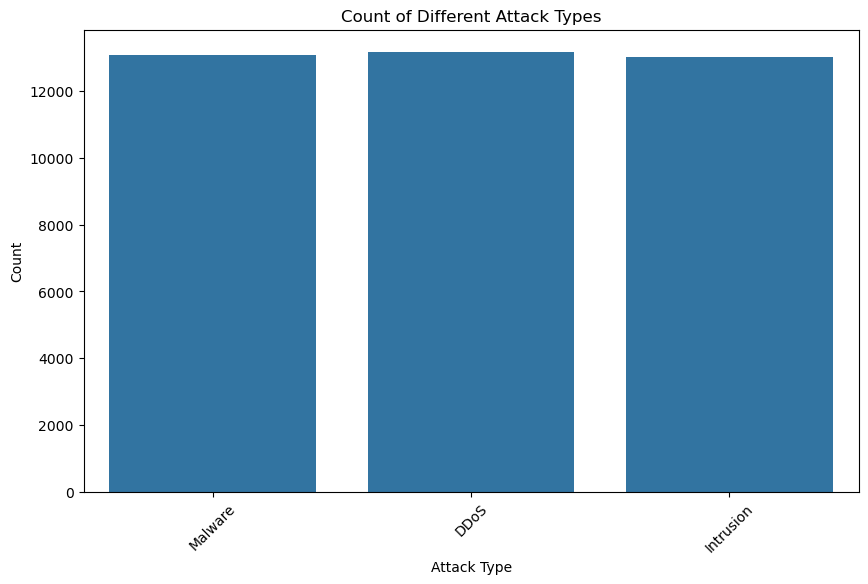

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for attack types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='attack_type')
plt.title('Count of Different Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

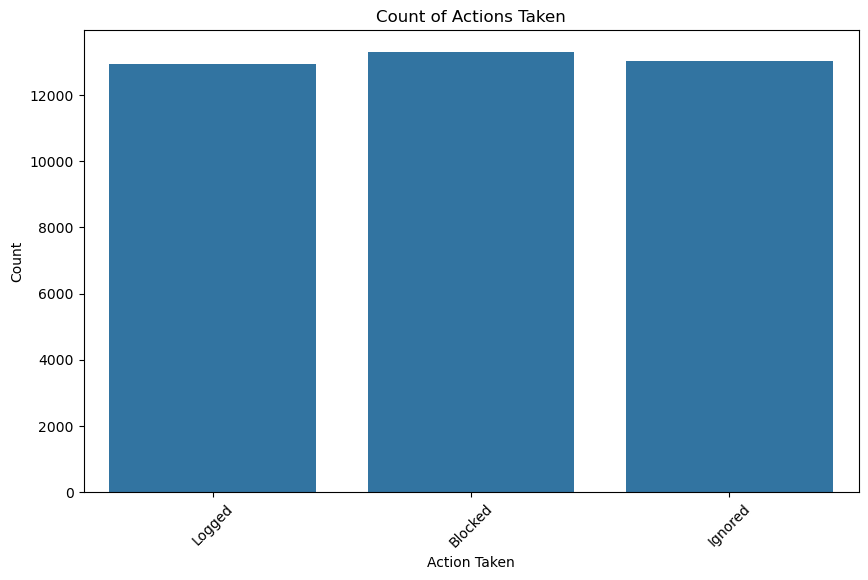

In [38]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='action_taken')
plt.title('Count of Actions Taken')
plt.xlabel('Action Taken')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [40]:
china_source = df[df['source_country'] == 'China']
total_china = len(china_source)
us_source = df[df['source_country'] == 'United States']
total_us = len(us_source)

difference = total_us - total_china
per_diff = (difference / total_us) * 100

print(f"Percentage difference: {per_diff:.2f}%")

Percentage difference: 77.92%
